# Computing in Context: Public Policy
## Project 3

---

In the final project, you are going to use everything you have learned about exploratory data analysis, aggregating and merging data, and data visualization.

Specifically, you need to do five things in this project:

- State a policy question you want to answer
- Choose a primary dataset that is relevant to your question
- Choose a secondary dataset that can be combined with your primary dataset to help answer your question
- Combine the datasets
- Create a data visualization that answers your question

For the datasets, here is some guidance:

- For the primary dataset, the unit of observation should make sense and not be overly aggregated.
- Your secondary dataset might be more aggregated than your primary dataset.
- There are no hard and fast rules, but I encourage you to look for a primary dataset with at least 1000 rows.
- If you are having a hard time, you can use any of the datasets from class or lab. If you are sick of those datasets, below are two possible primary datasets you can choose from and two possible secondary datasets you can choose from.
- **Students who find their own datasets (that we have not used in class or lab) will receive up to 10 bonus points based on the quality of the datasets you choose.**

Possible primary datasets:

- [NYC Department of Buildings construction and demolition permits](https://data.cityofnewyork.us/Housing-Development/DOB-Permit-Issuance/ipu4-2q9a)
- [NYPD felony, misdemeanor, and violation crime reports](https://data.cityofnewyork.us/Public-Safety/NYPD-Complaint-Data-Historic/qgea-i56i)

Possible secondary datasets:

- [NYC Neighborhood Tabulation Area demographics](https://data.cityofnewyork.us/City-Government/Demographic-Profiles-of-ACS-5-Year-Estimates-at-th/8cwr-7pqn)
- [NOAA NY daily weather data](https://w2.weather.gov/climate/xmacis.php?wfo=okx)

To submit the project, upload the completed notebook (with all cells run) to Courseworks.

**We encourage you to work in groups of 3 on this project, but you have the option to work alone if you like.**

## GROUP:

Sophia Ng
UNI: swn2111
    
Eliana Sherwood
UNI: ers2237


---

### Task 1

State the policy question you want to answer in one sentence.

**TASK 1 POLICY QUESTION:**

What are the racial demographics of the top ten junior high feeder schools for specialized high schools' in New York City?

---

### Task 2

Describe the primary dataset you are using to help answer this question. Please include:

- The source of the dataset
- What each row in the dataset represents
- Which columns are relevant to your analysis and what they represent

**TASK 2 ANSWER**

- Source: https://data.cityofnewyork.us/Education/2017-School-Quality-Report/cxrn-zyvb
- Each row in the dataset represents a high school in New York City in 2017.
- The columns in my analysis represent the dbn (school unique identifier), school name, and percentage of Asian, Black, Hispanic, and White students, respectively. 


Read in your primary dataset and show us the first five rows.

In [1]:
# Import relevant libraries
import pandas as pd
import matplotlib.pyplot as plt

# Make sure notebook prints plots
%matplotlib inline

school_qual_df = pd.read_excel('2017_School_Quality_Report.xlsx', sheet_name = 'EMS',
                 usecols = ['dbn', 'school_name',
                            'asian', 'black', 'hispanic', 'white'])
school_qual_df_clean = school_qual_df.copy()
school_qual_df_clean.head()

,dbn,school_name,asian,black,hispanic,white
0,01M015,P.S. 015 Roberto Clemente,0.068,0.298,0.584,0.025
1,01M019,P.S. 019 Asher Levy,0.077,0.202,0.664,0.053
2,01M020,P.S. 020 Anna Silver,0.329,0.098,0.491,0.042
3,01M034,P.S. 034 Franklin D. Roosevelt,0.053,0.297,0.614,0.030
4,01M063,The STAR Academy - P.S.63,0.039,0.191,0.646,0.101


---

### Task 3

Describe the secondary dataset you are using to help answer your question. Please include:

- The source of the dataset
- What each row in the dataset represents
- Which columns are relevant to your analysis and what they represent

**TASK 3 ANSWER**

- Source: https://data.cityofnewyork.us/Education/2017-2018-SHSAT-Admissions-Test-Offers-By-Sending-/vsgi-eeb5
- Each row in the dataset represents a feeder school for specialized high schools in New York City in 2017.
- The columns in my analysis represent the dbn (school unique identifier) and count of offers.



Read in your secondary dataset and show us the first five rows.

In [7]:
offers_df = pd.read_csv('2017-2018_SHSAT_Admissions_Test_Offers_By_Sending_School.csv',
            usecols = ['Feeder School DBN', 'Count of Offers'])


offers_df_clean = offers_df.copy()

offers_df_clean.rename(columns = {'Feeder School DBN': 'dbn','Count of Offers': 'offer_count'},
                      inplace = True)

offers_df_clean.head()

,dbn,offer_count
0,01M034,0-5
1,01M140,0-5
2,01M184,23
3,01M188,0-5
4,01M301,0-5


---

### Task 4

Combine your primary and secondary dataset. Follow the best practices we discussed in lecture 4 for mergining datasets.

In [38]:
qual_offer_df = school_qual_df_clean.merge(offers_df_clean,
                         how = 'left',
                         on = 'dbn')

qual_offer_df.head()

,dbn,school_name,asian,black,hispanic,white,offer_count
0,01M015,P.S. 015 Roberto Clemente,0.068,0.298,0.584,0.025,NaN
1,01M019,P.S. 019 Asher Levy,0.077,0.202,0.664,0.053,NaN
2,01M020,P.S. 020 Anna Silver,0.329,0.098,0.491,0.042,NaN
3,01M034,P.S. 034 Franklin D. Roosevelt,0.053,0.297,0.614,0.030,0-5
4,01M063,The STAR Academy - P.S.63,0.039,0.191,0.646,0.101,NaN


---

### Task 5

Create a data visualization that answers the question you posed in task 1. Follow the best practices we discussed in lecture 5 for visualizing data.

In [50]:
# To create data viz, first conduct exploratory data analysis on 'offer_count' column
# count of rows
qual_offer_df['dbn'].count()

1269

In [53]:
# count of distinct values in 'offer_count' col
qual_offer_df['offer_count'].value_counts()

592

In [60]:
# count of "NaN" in 'offer_count' col
qual_offer_df.isna().sum()

dbn              0
school_name      0
asian            0
black            0
hispanic         0
white            0
offer_count    677
dtype: int64

In [9]:
# Next, to create data viz, we need to clean data
# in order to get the top 10 schools offered admission into specialized HS need to change col dtype from 'O' to 'int'

# drop 471/1269 rows with value 'offer_count' ='0-5' because those schools won't be in our top 10
qual_offer_df_2 = qual_offer_df[qual_offer_df.offer_count != '0-5']

# we have NaNs in the merged dataset because there were schools in the primary dataset... 
# ...that did not have data to be merged with the secondary dataset
# drop 677/1269 rows with 'offer_count' = NaN
qual_offer_df_2 = qual_offer_df_2.dropna()

# now that we got rid of NaN and strings, change 'offer_count' column to int dtype
qual_offer_df_2["offer_count"] = pd.to_numeric(qual_offer_df_2["offer_count"])

# sort by schools by 'offer_count' in descending order 
qual_offer_df_3 = qual_offer_df_2.sort_values(['offer_count'], ascending=[False])

# create new df with the top 10 schools that received admission to specialized HS
qual_offer_df_4 = qual_offer_df_3.nlargest(10, ['offer_count']) 
qual_offer_df_4

,dbn,school_name,asian,black,hispanic,white,offer_count
666,20K187,The Christa McAuliffe School\I.S. 187,0.668,0.006,0.064,0.260,205
709,21K239,Mark Twain I.S. 239 for the Gifted & Talented,0.269,0.064,0.057,0.535,196
74,03M054,J.H.S. 054 Booker T. Washington,0.112,0.079,0.127,0.619,150
507,15K051,M.S. 51 William Alexander,0.133,0.076,0.188,0.558,122
60,02M312,New York City Lab Middle School for Collaborative,0.519,0.018,0.059,0.335,113
691,21K098,I.S. 98 Bay Academy,0.264,0.027,0.085,0.601,104
669,20K201,J.H.S. 201 The Dyker Heights,0.489,0.004,0.158,0.342,101
848,26Q074,J.H.S. 074 Nathaniel Hawthorne,0.646,0.043,0.101,0.195,95
865,26Q216,J.H.S. 216 George J. Ryan,0.653,0.052,0.132,0.140,95
826,25Q185,J.H.S. 185 Edward Bleeker,0.548,0.024,0.297,0.125,93


In [23]:
# drop 'offer_count' column to make plotting easier 
# only needed 'offer_count' column in last chunk to filter top 10 schools 
qual_offer_df_5 = qual_offer_df_4.drop(columns='offer_count')
qual_offer_df_5


,dbn,school_name,asian,black,hispanic,white
666,20K187,The Christa McAuliffe School\I.S. 187,0.668,0.006,0.064,0.260
709,21K239,Mark Twain I.S. 239 for the Gifted & Talented,0.269,0.064,0.057,0.535
74,03M054,J.H.S. 054 Booker T. Washington,0.112,0.079,0.127,0.619
507,15K051,M.S. 51 William Alexander,0.133,0.076,0.188,0.558
60,02M312,New York City Lab Middle School for Collaborative,0.519,0.018,0.059,0.335
691,21K098,I.S. 98 Bay Academy,0.264,0.027,0.085,0.601
669,20K201,J.H.S. 201 The Dyker Heights,0.489,0.004,0.158,0.342
848,26Q074,J.H.S. 074 Nathaniel Hawthorne,0.646,0.043,0.101,0.195
865,26Q216,J.H.S. 216 George J. Ryan,0.653,0.052,0.132,0.140
826,25Q185,J.H.S. 185 Edward Bleeker,0.548,0.024,0.297,0.125


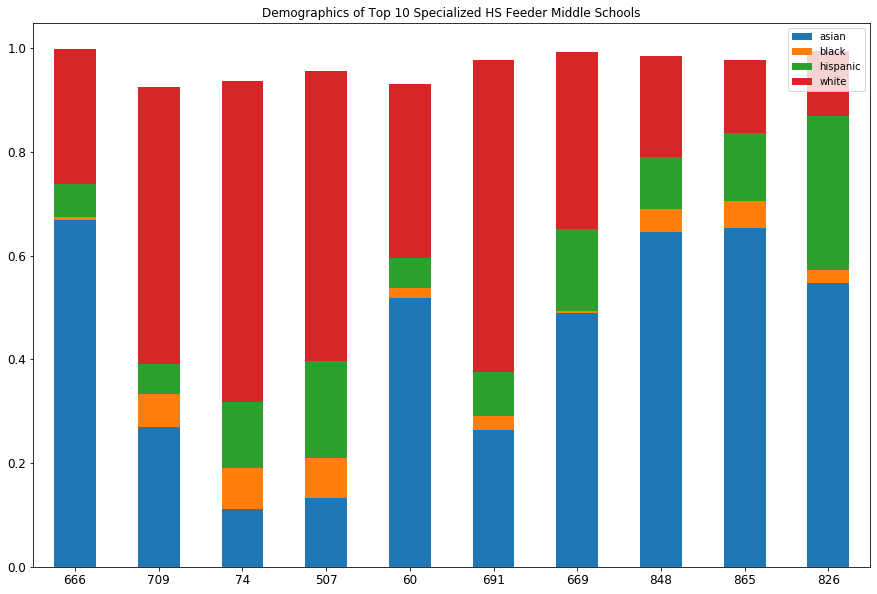

In [54]:
# stacked bar chart data visualization
qual_offer_df_5.plot(kind='bar', stacked=True, rot=0, 
                                              title='Demographics of Top 10 Specialized HS Feeder Middle Schools', 
                                              figsize=(15,10), fontsize=12)
